### **1. Business Understanding**
- **Stakeholder:** SyriaTel's business team.
- **Business Problem:** Customer churn leads to revenue loss. Identifying at-risk customers allows the company to implement retention strategies. This project involves predicting customer churn for SyriaTel using a binary classification modeling approach.


- **Key Questions:**
  - What factors influence churn?
  - Can we predict churn with high accuracy?
  - How can SyriaTel use these insights to reduce churn?

### **2. Data Understanding**
- **Dataset Overview:** The dataset has 3333 rows and 21 columns.
- **Target Variable:** `churn` (binary: True/False)
- **Feature Categories:**
  - **Customer Demographics:** `state`,  `account length`, `area code`, `phone number`. (likely not useful)
  - **Service Plans:** `international plan`, `voice mail plan`
  - **Usage Behavior:** `total minutes`, `total calls`, `total charges` across day, evening, night, and international
  - **Customer Support Interaction:** `customer service calls`
  
- **Categorical Features:**
    - State.
    - International plan.
    - Voice Mail Plan.

- **Numerical Features:**




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

## Data Preparation

In [2]:
df = pd.read_csv('Data/bigml_59c28831336c6604c800002a.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
# Checking Summary Statistics for numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#Checking the count of unique values in each column
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [6]:
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

### Churn Distribution - Bar Chart

- This is an imbalanced dataset which needs to be addressed before modeling it can cause the model to make false predictions.

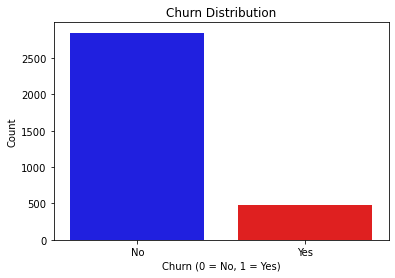

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette=['blue', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

<Figure size 1080x432 with 0 Axes>

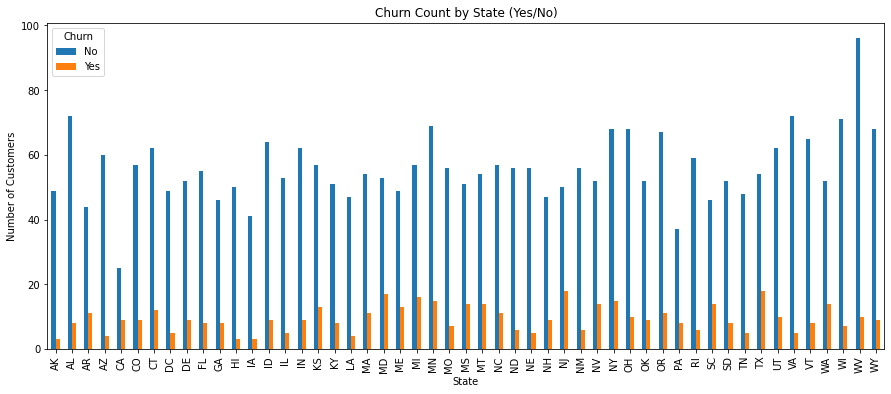

In [8]:
# Grouping by state
churn_by_state = df.groupby(['state', 'churn']).size().unstack()

# Plot
plt.figure(figsize=(15, 6))
churn_by_state.plot(kind='bar', figsize=(15, 6))
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.title("Churn Count by State (Yes/No)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.xticks(rotation=90)
plt.show()

In [9]:
#Checking the count of unique values in each column
df.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [10]:
# Drop irrelevant columns
df = df.drop(columns=['phone number'], axis=1)
df.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn'],
      dtype='object')

In [11]:
df1 = df.copy()

# Convert 'churn' to numerical
le = LabelEncoder()
df1['churn'] = le.fit_transform(df1['churn'])  # 1 for churned, 0 for retained
df1[['churn']]

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


## One-Hot Encoding
- Transforming categorical features into dummy variables as 0 and 1 to be able to use them in classification models.

In [12]:
# Convert categorical variables
df1 = pd.get_dummies(df1, columns=['state', 'area code', 'international plan', 'voice mail plan'], drop_first=True)
df1

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0,0,0,0,0,0,1,0,0,1
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0,0,0,0,1,0,1,0,0,0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0,0,0,0,0,0,0,1,0,0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0,0,0,0,0,0,0,1,1,0


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day calls         3333 non-null   int64  
 4   total day charge        3333 non-null   float64
 5   total eve minutes       3333 non-null   float64
 6   total eve calls         3333 non-null   int64  
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night calls       3333 non-null   int64  
 10  total night charge      3333 non-null   float64
 11  total intl minutes      3333 non-null   float64
 12  total intl calls        3333 non-null   int64  
 13  total intl charge       3333 non-null   float64
 14  customer service calls  3333 non-null   

In [14]:
# Define feature set (X) and target variable (y)
X = df1.drop(columns=['churn'])
y = df1['churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
# Standardize numerical features
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [16]:

# Initialize and train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_sc, y_train)


LogisticRegression(random_state=42)

In [17]:

# Make predictions
y_pred = log_reg.predict(X_test_sc)
y_pred_proba = log_reg.predict_proba(X_test_sc)[:, 1]


In [18]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC Score: {roc_auc:.4f}')
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.8606
Precision: 0.5417
Recall: 0.2680
F1 Score: 0.3586
ROC AUC Score: 0.8010
Confusion Matrix:
 [[548  22]
 [ 71  26]]


In [19]:
# Generating the classification report
class_report = classification_report(y_test, y_pred)

# Print results
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       570
           1       0.54      0.27      0.36        97

    accuracy                           0.86       667
   macro avg       0.71      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667



### **Interpretation of the Classification Report:**

The classification report provides key performance metrics for both classes (0 and 1).

#### **Class 0 (Non-Churned Customers)**
- **Precision: 0.89** → When the model predicts **"Not Churn" (0)**, it is correct **89%** of the time.
- **Recall: 0.96** → The model correctly identifies **96%** of all actual **non-churned** customers.
- **F1-Score: 0.92** → A balanced measure of precision and recall, meaning the model performs **very well** in identifying non-churned customers.

#### **Class 1 (Churned Customers)**
- **Precision: 0.54** → When the model predicts **"Churn" (1)**, it is correct **54%** of the time.  
- **Recall: 0.27** → The model only catches **27%** of actual churned customers (meaning it **misses** a lot of them).  
- **F1-Score: 0.36** → A low score due to poor recall, indicating that the model struggles to detect churn.



### **Overall Model Performance**
- **Accuracy: 0.86 (86%)** → The model correctly classifies **86%** of total customers.



### **Key Insights:**
1. **Model is biased toward predicting "No Churn" (0).**
   - High recall for class 0 (96%) but very low recall for class 1 (27%).
   - This suggests the model is **not identifying enough churned customers**.
   
2. **False Negatives are high (many churners are misclassified as non-churn).**
   - This is **risky** for businesses because missing churners means they cannot take proactive action to retain them.
   
3. **This model is likely underfitting because:**

   - Low recall (26.8%) suggests the model is too simple and fails to capture churners properly.
   - F1 Score is low (35.86%), which means the model does not generalize well to the test data.
   - High accuracy but poor recall indicates that the model is biased towards predicting customers as non-churners, potentially due to class imbalance.

4. **Potential Fixes:**
   - **Try different models** like **Random Forest, Decision Tree**, or **SMOTE** for better churn detection.
   - **Resample the dataset** (e.g., oversampling churned customers or undersampling non-churned ones).
   - **Adjust the decision threshold** (instead of 0.5, lowering it to catch more churn cases).


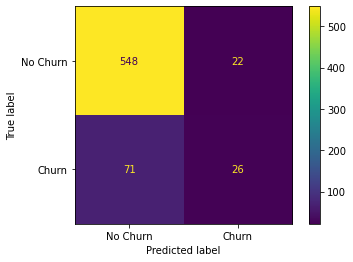

In [20]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='viridis')


### **Interpretation:**
- **True Negatives (TN) = 548** → Customers correctly predicted as *not churning*  
- **False Positives (FP) = 22** → Customers incorrectly predicted as *churning* (but they didn't)  
- **False Negatives (FN) = 71** → Customers incorrectly predicted as *not churning* (but they did)  
- **True Positives (TP) = 26** → Customers correctly predicted as *churning*  
